# Spline accuracy

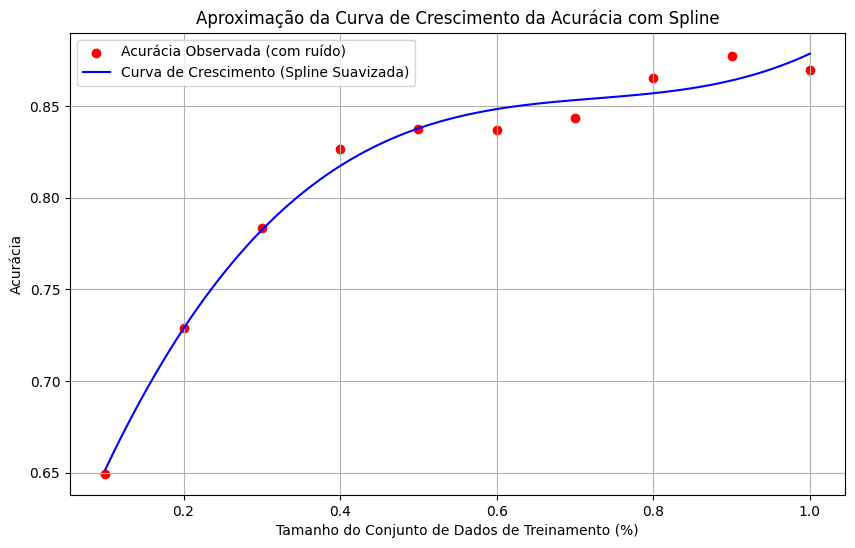

In [9]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

# Dados simulados (exemplo)
# x = porcentagem do conjunto de dados
# y = acurácia do modelo
x_data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
y_data = np.array([0.65, 0.72, 0.78, 0.81, 0.83, 0.84, 0.85, 0.86, 0.865, 0.87])

# Adiciona um pouco de ruído para ilustrar o suavização
y_noisy = y_data + np.random.normal(0, 0.01, size=len(y_data))

# Crie a spline suavizante
# O parâmetro 's' controla a suavidade. 's=0' é uma interpolação exata.
# Um valor maior resulta em uma curva mais suave. Ajuste conforme necessário.
spline = UnivariateSpline(x_data, y_noisy)
# spline = InterpolatedUnivariateSpline(x_data, y_noisy)

# Gere novos pontos para a curva suavizada
x_smooth = np.linspace(0.1, 1.0, 100)
y_smooth = spline(x_smooth)

# Plote os resultados
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_noisy, color='red', label='Acurácia Observada (com ruído)')
plt.plot(x_smooth, y_smooth, color='blue', label='Curva de Crescimento (Spline Suavizada)')
plt.title('Aproximação da Curva de Crescimento da Acurácia com Spline')
plt.xlabel('Tamanho do Conjunto de Dados de Treinamento (%)')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()


MagDerivative: 0.024527380952380884
MagDerivative: -0.006535978835978751
MagDerivative: 0.02130912698412682
MagDerivative: 0.032015873015873046
MagDerivative: 0.02903662818662822
MagDerivative: 0.029186713286713167


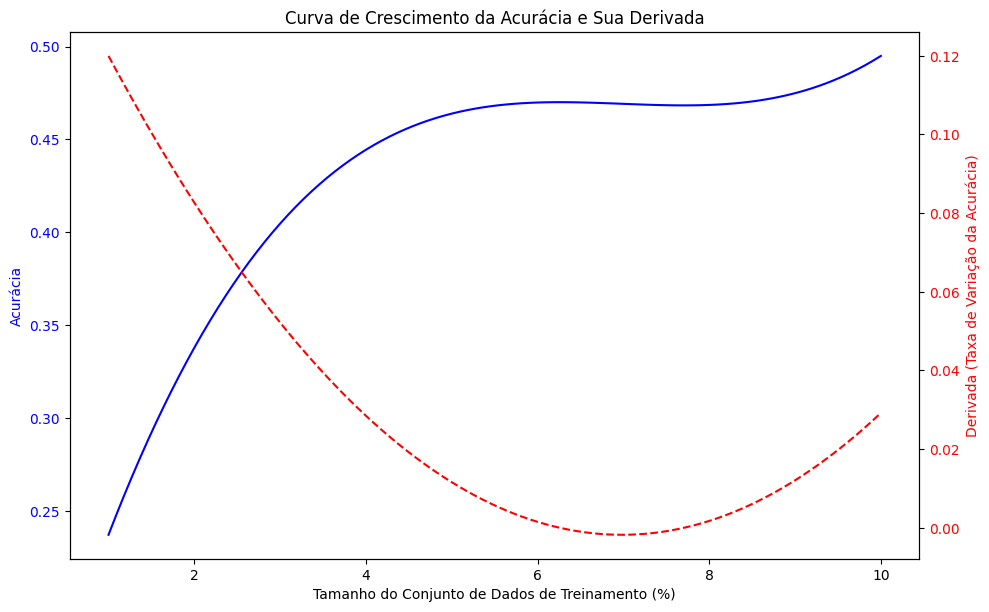

In [36]:
# Dados simulados (exemplo)
x_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_data = np.array([0.2268, 0.3552, 0.4027, 0.448, 0.4611, 0.451, 0.4711, 0.4812, 0.4813, 0.4874])
# y_data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
# y_noisy = y_data + np.random.normal(0, 0.01, size=len(y_data))

for size in range(5, 11):
    # Crie a spline suavizante
    spline = UnivariateSpline(x_data[:size], y_data[:size])
    
    # Obtenha a spline da primeira derivada
    derivative_spline = spline.derivative(n=1)
    
    # Calcule a magnitude da derivada nos pontos de dados originais
    derivative_values = derivative_spline(x_data[:size])
    
    print(f"MagDerivative: {derivative_values[-1]}")
    
    # Opcional: Plote a curva original e a derivada para visualização
    x_smooth = np.linspace(1, size, 100)
    y_smooth = spline(x_smooth)
    y_derivative_smooth = derivative_spline(x_smooth)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Tamanho do Conjunto de Dados de Treinamento (%)')
ax1.set_ylabel('Acurácia', color='blue')
ax1.plot(x_smooth, y_smooth, color='blue', label='Curva de Crescimento')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Derivada (Taxa de Variação da Acurácia)', color='red')
ax2.plot(x_smooth, y_derivative_smooth, color='red', linestyle='--', label='Derivada da Curva')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.title('Curva de Crescimento da Acurácia e Sua Derivada')
plt.show()

# Smoothing

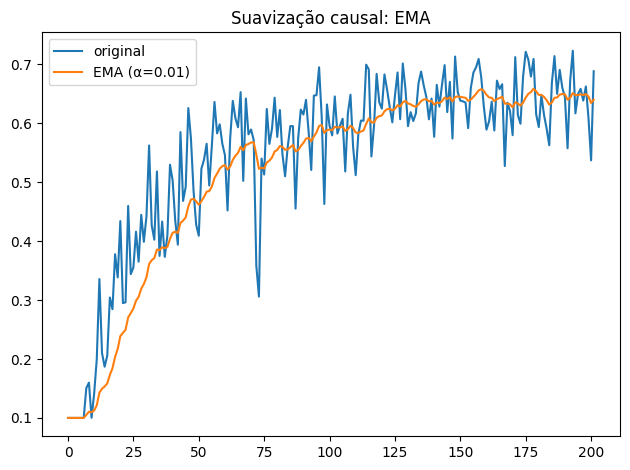

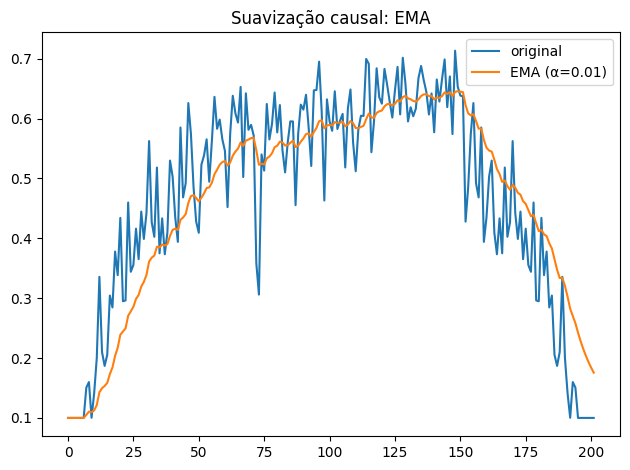

In [17]:
import numpy as np
import matplotlib.pyplot as plt

y = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1507,0.1599,0.1002,0.1413,0.2001,0.3357,0.2102,0.1869,0.2055,0.3044,0.2846,0.3779,0.3385,0.4342,0.2949,0.2963,0.4599,0.3441,0.3555,0.4162,0.3652,0.4447,0.399,0.4424,0.5625,0.427,0.4026,0.5183,0.375,0.4334,0.3734,0.4096,0.5299,0.5031,0.4348,0.3941,0.5852,0.4684,0.4922,0.626,0.5744,0.4854,0.4279,0.4093,0.523,0.5383,0.5654,0.4946,0.5622,0.6364,0.583,0.5984,0.5656,0.546,0.4522,0.5744,0.6382,0.609,0.5934,0.653,0.5024,0.6423,0.5814,0.5896,0.5717,0.3584,0.306,0.5402,0.5132,0.6245,0.5652,0.5912,0.6437,0.577,0.6227,0.5472,0.5102,0.5602,0.5954,0.5953,0.4554,0.5746,0.6234,0.6151,0.6399,0.5855,0.5209,0.6472,0.6479,0.6952,0.6112,0.4632,0.6322,0.5958,0.5797,0.6457,0.5827,0.5963,0.6079,0.5184,0.6167,0.6487,0.5601,0.5121,0.5817,0.6048,0.6045,0.6997,0.6916,0.5439,0.5958,0.6841,0.6358,0.625,0.6831,0.6571,0.628,0.6018,0.6469,0.6864,0.6071,0.7017,0.6591,0.5953,0.619,0.604,0.6168,0.6678,0.688,0.6645,0.6448,0.6069,0.6421,0.5772,0.6654,0.6285,0.6659,0.6989,0.6192,0.6705,0.5742,0.7135,0.6536,0.6385,0.6374,0.6353,0.5919,0.6597,0.6863,0.6951,0.7094,0.678,0.6278,0.5894,0.6036,0.6368,0.5879,0.6726,0.6583,0.6664,0.5276,0.6352,0.6211,0.58,0.7125,0.6141,0.5994,0.6798,0.7216,0.7083,0.6795,0.7094,0.6152,0.5938,0.6481,0.6143,0.591,0.5629,0.6686,0.7142,0.6502,0.6908,0.6605,0.6441,0.5578,0.6724,0.7234,0.617,0.6498,0.6587,0.6387,0.6627,0.6092,0.5372,0.6885])

n = 50
elementos_invertidos = y[:n][::-1]
y_mod = y.copy()
y_mod[-n:] = elementos_invertidos

# 1) EMA (Exponential Moving Average) — causal, barato, com pequeno atraso
def ema_online(a, alpha=0.2):
    out = np.empty_like(a, dtype=float)
    out[0] = a[0]
    for t in range(1, len(a)):
        out[t] = alpha*a[t] + (1.0 - alpha)*out[t-1]
    return out

# 2) Holt (dupla suavização) — captura tendência com atualização online
def holt_linear_online(a, alpha=0.3, beta=0.05, l0=None, b0=None):
    a = np.asarray(a, dtype=float)
    l = np.empty_like(a)
    b = np.empty_like(a)
    l[0] = a[0] if l0 is None else l0
    # tendência inicial: diferença inicial ou fornecida
    b[0] = (a[1] - a[0]) if b0 is None else b0
    for t in range(1, len(a)):
        # atualização de nível e tendência (forma clássica)
        l_prev = l[t-1]
        b_prev = b[t-1]
        l[t] = alpha*a[t] + (1.0 - alpha)*(l_prev + b_prev)
        b[t] = beta*(l[t] - l_prev) + (1.0 - beta)*b_prev
    # como série alisada, use o nível (l); se preferir, l+b suaviza ainda mais a subida
    return l

# 3) Kalman — modelo de tendência local (nível + inclinação), puramente causal
def kalman_local_linear_trend(a, q_level=1e-4, q_trend=1e-6, r=None):
    """
    Estado x = [nível, tendência]; F=[[1,1],[0,1]]; H=[1,0].
    q_level/q_trend controlam suavidade (quanto menor, mais suave).
    r é a variância do ruído de observação (heurística abaixo).
    """
    a = np.asarray(a, dtype=float)
    n = len(a)
    x = np.zeros((2,))          # estado: [nivel, tendencia]
    x[0] = a[0]
    x[1] = 0.0
    P = np.eye(2)*1.0           # covariância inicial
    F = np.array([[1.0, 1.0],
                  [0.0, 1.0]])
    Q = np.array([[q_level, 0.0],
                  [0.0,    q_trend]])
    H = np.array([[1.0, 0.0]])
    if r is None:
        # heurística: ~1% da variância da série (ajuste conforme ruído)
        r = np.var(a)*0.01 if np.var(a) > 0 else 1e-6
    R = np.array([[r]])

    filt = np.empty(n, dtype=float)
    for t in range(n):
        # previsão
        if t > 0:
            x = F @ x
            P = F @ P @ F.T + Q
        # atualização
        y_pred = H @ x
        e = a[t] - y_pred[0]
        S = H @ P @ H.T + R
        K = (P @ H.T) @ np.linalg.inv(S)
        x = x + (K.flatten() * e)
        P = (np.eye(2) - K @ H) @ P
        filt[t] = x[0]  # nível filtrado (suavizado causalmente)
    return filt

# --- Executa os três métodos ---
y_ema  = ema_online(y, alpha=0.1)            # ↑ alpha = reage mais rápido; ↓ = mais suave
y_ema_mod  = ema_online(y_mod, alpha=0.1)            # ↑ alpha = reage mais rápido; ↓ = mais suave
# y_holt = holt_linear_online(y, 0.3, 0.05)    # ajuste alpha/beta conforme o serrilhado
# y_kf   = kalman_local_linear_trend(y, q_level=1e-4, q_trend=1e-6)

# --- Plots: um gráfico por método (sem estilos/cores explícitos) ---
plt.figure()
plt.plot(y, label="original")
plt.plot(y_ema, label="EMA (α=0.01)")
plt.title("Suavização causal: EMA")
plt.legend()
plt.tight_layout()

plt.figure()
plt.plot(y_mod, label="original")
plt.plot(y_ema_mod, label="EMA (α=0.01)")
plt.title("Suavização causal: EMA")
plt.legend()
plt.tight_layout()

# plt.figure()
# plt.plot(y, label="original")
# plt.plot(y_holt, label="Holt (nível+tendência)")
# plt.title("Suavização causal: Holt (dupla exponencial)")
# plt.legend()
# plt.tight_layout()
# 
# plt.figure()
# plt.plot(y, label="original")
# plt.plot(y_kf, label="Kalman (tendência local)")
# plt.title("Suavização causal: Kalman (nível + inclinação)")
# plt.legend()
# plt.tight_layout()

plt.show()


In [11]:
initial = y[:50]
np.flip(initial)


array([0.4279, 0.4854, 0.5744, 0.626 , 0.4922, 0.4684, 0.5852, 0.3941,
       0.4348, 0.5031, 0.5299, 0.4096, 0.3734, 0.4334, 0.375 , 0.5183,
       0.4026, 0.427 , 0.5625, 0.4424, 0.399 , 0.4447, 0.3652, 0.4162,
       0.3555, 0.3441, 0.4599, 0.2963, 0.2949, 0.4342, 0.3385, 0.3779,
       0.2846, 0.3044, 0.2055, 0.1869, 0.2102, 0.3357, 0.2001, 0.1413,
       0.1002, 0.1599, 0.1507, 0.1   , 0.1   , 0.1   , 0.1   , 0.1   ,
       0.1   , 0.1   ])

Melhor ordem ARIMA(p,d,q) por AIC: (2, 0, 1)


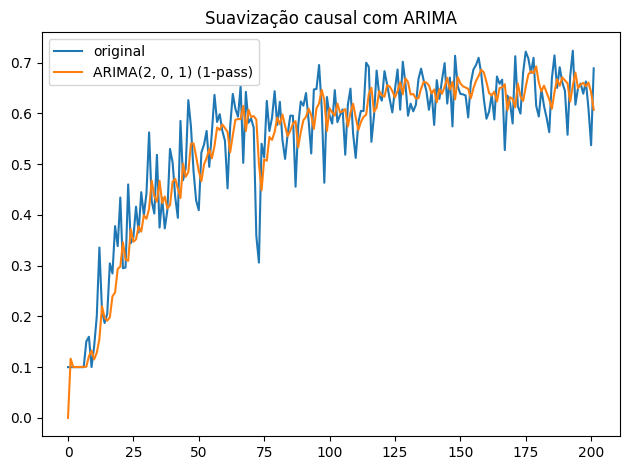

In [7]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

warnings.filterwarnings("ignore")

# --- sua série ---
y = np.array([
    0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1507,0.1599,0.1002,0.1413,0.2001,0.3357,0.2102,0.1869,0.2055,0.3044,0.2846,0.3779,0.3385,0.4342,0.2949,0.2963,0.4599,0.3441,0.3555,0.4162,0.3652,0.4447,0.399,0.4424,0.5625,0.427,0.4026,0.5183,0.375,0.4334,0.3734,0.4096,0.5299,0.5031,0.4348,0.3941,0.5852,0.4684,0.4922,0.626,0.5744,0.4854,0.4279,0.4093,0.523,0.5383,0.5654,0.4946,0.5622,0.6364,0.583,0.5984,0.5656,0.546,0.4522,0.5744,0.6382,0.609,0.5934,0.653,0.5024,0.6423,0.5814,0.5896,0.5717,0.3584,0.306,0.5402,0.5132,0.6245,0.5652,0.5912,0.6437,0.577,0.6227,0.5472,0.5102,0.5602,0.5954,0.5953,0.4554,0.5746,0.6234,0.6151,0.6399,0.5855,0.5209,0.6472,0.6479,0.6952,0.6112,0.4632,0.6322,0.5958,0.5797,0.6457,0.5827,0.5963,0.6079,0.5184,0.6167,0.6487,0.5601,0.5121,0.5817,0.6048,0.6045,0.6997,0.6916,0.5439,0.5958,0.6841,0.6358,0.625,0.6831,0.6571,0.628,0.6018,0.6469,0.6864,0.6071,0.7017,0.6591,0.5953,0.619,0.604,0.6168,0.6678,0.688,0.6645,0.6448,0.6069,0.6421,0.5772,0.6654,0.6285,0.6659,0.6989,0.6192,0.6705,0.5742,0.7135,0.6536,0.6385,0.6374,0.6353,0.5919,0.6597,0.6863,0.6951,0.7094,0.678,0.6278,0.5894,0.6036,0.6368,0.5879,0.6726,0.6583,0.6664,0.5276,0.6352,0.6211,0.58,0.7125,0.6141,0.5994,0.6798,0.7216,0.7083,0.6795,0.7094,0.6152,0.5938,0.6481,0.6143,0.591,0.5629,0.6686,0.7142,0.6502,0.6908,0.6605,0.6441,0.5578,0.6724,0.7234,0.617,0.6498,0.6587,0.6387,0.6627,0.6092,0.5372,0.6885
])

# --- busca simples por AIC em uma grade pequena ---
def select_arima_aic(y, pdq_grid=None):
    if pdq_grid is None:
        pdq_grid = [(p,d,q) for p in range(0,3) for d in (0,1) for q in range(0,3)]
    best = {"aic": np.inf, "order": None, "res": None}
    for (p,d,q) in pdq_grid:
        try:
            mod = sm.tsa.SARIMAX(
                y, order=(p,d,q), trend='n',
                enforce_stationarity=False, enforce_invertibility=False
            )
            res = mod.fit(disp=False)
            if res.aic < best["aic"]:
                best = {"aic": res.aic, "order": (p,d,q), "res": res}
        except Exception:
            pass
    return best["order"], best["res"]

order, res = select_arima_aic(y)

# série alisada = previsões 1-passo (in-sample)
y_arima = res.get_prediction().predicted_mean  # equivalente: res.fittedvalues

print("Melhor ordem ARIMA(p,d,q) por AIC:", order)

# --- Plot ---
plt.figure()
plt.plot(y, label="original")
plt.plot(y_arima, label=f"ARIMA{order} (1-pass)")
plt.title("Suavização causal com ARIMA")
plt.legend()
plt.tight_layout()
plt.show()

# --- Atualização incremental (sem refitar parâmetros) ---
# Suponha que chegue um novo bloco de dados:
y_new = np.array([0.70, 0.69, 0.68])  # EXEMPLO
res_upd = res.append(y_new, refit=False)   # filtra com os mesmos parâmetros
y_arima_upd = res_upd.get_prediction().predicted_mean
# y_arima_upd contém a série suavizada original + novos pontos suavizados


array([0.5934, 0.653 , 0.5024, 0.6423, 0.5814, 0.5896, 0.5717, 0.3584,
       0.306 , 0.5402])